# Latar Belakang

New York City adalah salah satu kota terbesar dan paling sibuk di dunia, dan layanan taksi merupakan tulang punggung dari sistem transportasi kota. NYC Taxi and Limousine Commission (TLC) bertanggung jawab untuk mengatur dan mengawasi operasi taksi dan layanan kendaraan sewa lainnya di kota ini. Dengan jutaan perjalanan yang dilakukan setiap bulan, mengoptimalkan operasi dan layanan taksi sangat penting untuk menjaga kelancaran mobilitas di kota. Dataset yang digunakan mencakup berbagai informasi penting terkait operasi taksi di NYC. Data ini mencakup detail setiap perjalanan seperti waktu penjemputan dan pengantaran, lokasi penjemputan dan pengantaran, jumlah penumpang, jarak tempuh, tarif, metode pembayaran, dan biaya tambahan lainnya. Dengan data ini, TLC dapat melakukan analisis mendalam untuk memahami dan meningkatkan layanan taksi.



## Stakeholder

**Business Team NYC TLC**

Analisis ini ditujukan kepada tim bisnis NYC TLC, lebih tepatnya kepada Divisi Policy and External Affairs. Divisi tersebut bertanggung jawab untuk memastikan misi perusahaan tercapai serta memonitor fenomena yang terjadi di industri tersebut baik di New York itu sendiri maupun di kota-kota lain. Divisi ini juga mengelola serta mengadakan proyek penelitian dan program-program dalam upaya mempertahankan nilai keselamatan, aksesibilitas, dan akuntabilitas, dengan memanfaatkan data perjalanan taksi dan data administrasi pengemudi dan kendaraan. Melalui analisis ini, tim bisnis NYC TLC akan mendapatkan pemahaman yang lebih dalam terkait operasional serta perilaku pelanggan NYC TLC. Sehingga insight yang sudah diterima dapat membantu tim bisnis NYC TLC dalam mengidentifikasi masalah dan mendapatkan solusi untuk pengembangan model bisnis NYC TLC.

# Pernyataan Masalah

Stakeholder ingin memahami lebih dalam mengenai perilaku customer dalam upaya menciptakan strategi bisnis yang efektif. Dalam industri trasnportasi, mengoptimalkan operasional dan meningkatkan profit bertumpu pada kepuasan customer melalui pemahaman terhadap pola permintaan serta preferensi waktu dan tempat.

Oleh karena itu sebagai data analyst, kita akan mencoba menjawab pertanyaan berikut:
   
1. Tipe pembayaran apa yang menjadi pilihan utama pelanggan dalam melakukan pembayaran?
    
    
2. Daerah mana saja yang menjadi "Hot Zones" atau daerah tersibuk yang memesan taksi (weekdays)?
    
    
3. Tipe pembayaran apa yang menjadi pilihan utama pelanggan dalam melakukan pembayaran?Apakah Durasi Perjalanan dan Jarak perjalanan memiliki pengaruh terhadap Total Pembayaran?

## Goals

This project analysis generally aims to provide insights on the day-to-day operations of NYC taxi, 
Analisis 

   1. Mengidentifikasi preferensi metode pembayaran, sehingga perusahaan dapat menyesuaikan opsi pembayaran untuk memenuhi kebutuhan pelanggan.
   
   
   
   2. Memastikan ketersediaan taksi terdistribusi dengan baik, dengan mengidentifikasi daerah tersibuk, perusahaan dapat menempatkan armada dengan lebih efektif, mengurangi waktu tunggu pelanggan, dan meningkatkan penggunaan taksi.
   
   
   
   3. Memahami dampak durasi dan jarak perjalanan terhadap jumlah tarif, maka dengan mengoptimalisasikan rute yang digunakan dapat mengurangi waktu perjalanan untuk meningkatkan kepuasan pelanggan.

# Dataset New York City TLC Trip Record

Berikut ini merupakan data yang digunakan [NYC TLC Trip Record](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

In [1]:
#import library
import pandas as pd
import numpy as np

import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
cf.go_offline()
import missingno as msno
import folium


#handle red notice
import warnings
warnings.filterwarnings('ignore')

#### Menampilkan data NYC TLC Trip Record

In [2]:
df=pd.read_csv('NYC TLC Trip Record.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Pada dataset ini terdapat informasi mengenai vendor, waktu pickup dan dropoff dan record perjalanan yang dilakukan oleh penumpang. Ada beberapa kolom di dalam dataset NYC TLC Trip Record, yaitu:
- VendorID : Kode yang menunjukkan penyedia LPEP yang menyediakan record. 1 - Creative Mobile Technologies, LLC. 2 -  VeriFone Inc.
- lpep_pickup_datetime : Tanggal dan waktu pickup penumpang.
- lpep_dropoff_datetime : Tanggal dan waktu dropoff penumpang.
- store_and_fwd_flag :Kode ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirimkan ke vendor, juga dikenal sebagai "store and forward", karena kendaraan tidak memiliki koneksi ke server. Y - catatan perjalanan disimpan dalam memori kendaraan. N - catatan perjalanan tidak disimpan dalam memori kendaraan.
- RatecodeID : Kode tarif akhir penumpang pada akhir perjalanan. 1 - tarif standard. 2 - John F. Kennedy International Airport. 3 - Newark. 4 - Nassau or Westchester. 5 - Negotiated Fare : tarif yang telah ditetapkan atau disepakati melalui negosiasi antara pelanggan dan penyedia layanan 6 - Group ride : Beberapa penumpang yang berbeda menggunakan kendaraan yang sama untuk tujuan yang serupa atau searah.
- PULocationID : ID lokasi pickup penumpang.
- DOLocationID : ID lokasi dropoff penumpang.
- passenger_count : Jumlah penumpang di dalam taksi.
- trip_distance : Jarak perjalanan yang tercatat pada taximeter.
- fare_amount : Tarif berdasarkan jarak termasuk biaya tambahan untuk jam sibuk dan perjalanan malam.
- extra : Biaya tambahan, saat ini hanya termasuk biaya jam sibuk serta biaya perjalanan malam.
- mta_tax : Pajak MTA (Metropolitan Transportation Authority) yang secara otomatis dipicu berdasarkan tarif yang dihitung oleh meter yang digunakan.
- tip_amount : Tip yang diberikan melalui kartu kredit.
- tolls_amount : Tarif tol jika dibutuhkan saat melakukan perjalanan.
- ehail_fee : Biaya tambahan yang dikenakan oleh layanan transportasi berbasis aplikasi ketika pengguna menggunakan untuk memesan kendaraan.
- improvement_surcharge : Biaya tambahan yang dikenakan pada perjalanan yang dipesan melalui tanda panggilan di titik penjemputan. Biaya peningkatan ini mulai diberlakukan pada tahun 2015.
- total_amount : Total tarif yang harus dibayar oleh penumpang (tidak termasuk tips berupa tunai).
- payment_type : Kode tipe pembayaran yang dilakukan penumpang. 1 - kartu kredit. 2 - tunai. 3- tidak ada biaya. 4 - ketidaksepakatan terkait dengan biaya, layanan, atau masalah lainnya antara pelanggan dan penyedia layanan. 5 - tidak diketahui. 6 - perjalanan yang dibatalkan.
- trip_type : Kode yang menunjukkan apakah perjalanan tersebut adalah panggilan di jalan atau pengiriman yang secara otomatis ditugaskan berdasarkan tarif yang dihitung oleh meter yang digunakan tetapi dapat diubah oleh pengemudi.
1 - Panggilan di jalan. 2 - Pengiriman
- congestion_surcharge : Tarif tambahan yang dikenakan kepada pengguna layanan transportasi untuk mengimbangi dampak kemacetan lalu lintas di area tertentu.

#### Menampilkan tipe data dari setiap kolom NYC TLC Trip Record

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

#### Mengubah tipe data object menjadi datetime

In [4]:
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

#### Menampilkan data Taxi Zone Lookup

Untuk mencari tahu wilayah pickup dan wilayah dropoff melalui kode dari kolom lpep_pickup_datetime dan kolom lpep_dropoff_datetime maka diperlukan data tambahan yang bisa diambil di website ini [taxi+_zone_lookup](https://www.kaggle.com/datasets/microize/newyork-yellow-taxi-trip-data-2020-2019/data?select=taxi%2B_zone_lookup.csv).

In [5]:
df_zone=pd.read_csv('taxi+_zone_lookup.csv')
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Pada dataset ini terdapat informasi mengenai ID Lokasi serta nama dari wilayah, zona dan service Z. Ada beberapa kolom di dalam dataset taxi+_zone_lookup, yaitu:
- LocationID   : ID Lokasi.
- Borough      : Nama wilayah berdasarkan ID Lokasi.
- Zone         : Nama zona berdasarkan ID Lokasi.
- service_zone : Nama jenis service yang tersedia sesuai dengan ID Lokasi.

#### Menggabungkan data NYC TLC Trip Record dan Taxi Zone Lookup

In [6]:
df = pd.merge(df, df_zone, left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'Pickup_Borough'}, inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,Pickup_Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,NaN,1.0,11.64,1.0,1.0,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone


In [7]:
df = pd.merge(df, df_zone, left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'Dropoff_Borough'}, inplace=True)
df.rename(columns={'Zone_x': 'PUZone', 'Zone_y': 'DOZone'}, inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,LocationID_x,Pickup_Borough,PUZone,service_zone_x,LocationID_y,Dropoff_Borough,DOZone,service_zone_y
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone


#### Menghapus kolom

In [8]:
df.drop(columns=['LocationID_x','service_zone_x','LocationID_y','service_zone_y'], inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North


# Data Understanding and Cleaning

## Handling Missing Value Data

#### Menampilkan jumlah missing value pada setiap kolom

In [9]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
Pickup_Borough               0
PUZone                      66
Dropoff_Borough              0
DOZone                     242
dtype: int64

#### Menampilkan missing value pada setiap kolom dalam persentase

In [10]:
round(df.isna().sum()/len(df)*100).astype(str)+' %'

VendorID                   0.0 %
lpep_pickup_datetime       0.0 %
lpep_dropoff_datetime      0.0 %
store_and_fwd_flag         6.0 %
RatecodeID                 6.0 %
PULocationID               0.0 %
DOLocationID               0.0 %
passenger_count            6.0 %
trip_distance              0.0 %
fare_amount                0.0 %
extra                      0.0 %
mta_tax                    0.0 %
tip_amount                 0.0 %
tolls_amount               0.0 %
ehail_fee                100.0 %
improvement_surcharge      0.0 %
total_amount               0.0 %
payment_type               6.0 %
trip_type                  6.0 %
congestion_surcharge       6.0 %
Pickup_Borough             0.0 %
PUZone                     0.0 %
Dropoff_Borough            0.0 %
DOZone                     0.0 %
dtype: object

#### Sebaran missing value di dalam data

<Axes: >

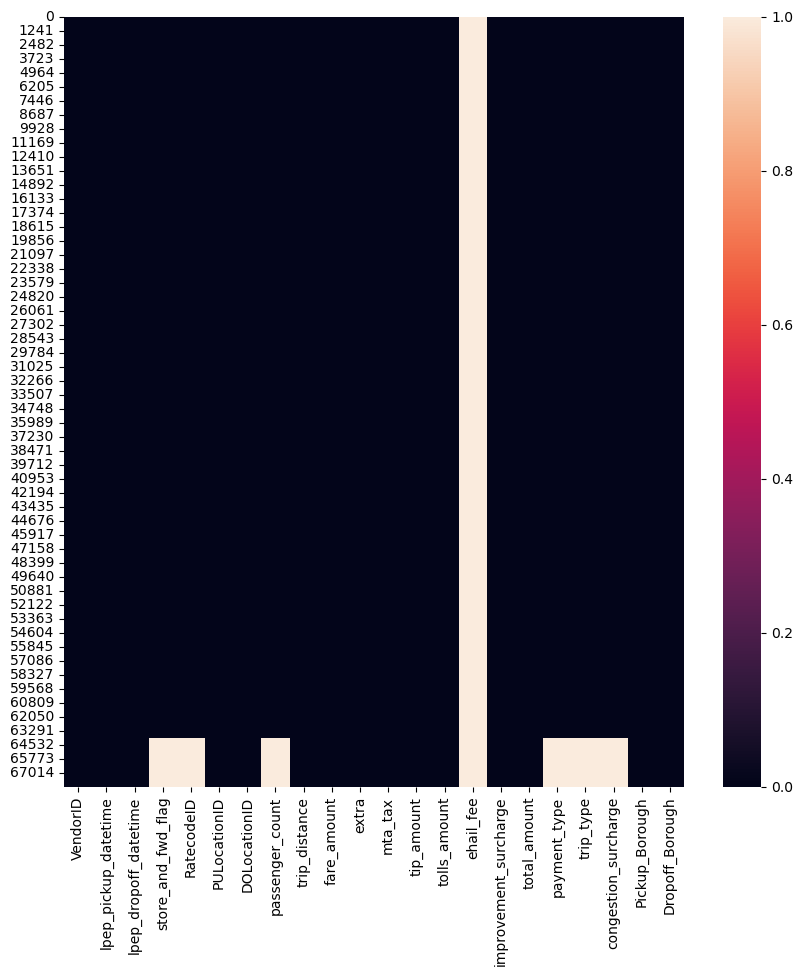

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','improvement_surcharge','total_amount','payment_type','trip_type','congestion_surcharge','Pickup_Borough','Dropoff_Borough']].isna())

Missing value terdapat pada kolom `store_and_fwd_flag, RatecodeID, passenger_count, ehail_fee` dimana:
- pada kolom **ehail_fee** memiliki missing value sebesar 100% dan kolom ini hanya dapat diisi jika mengetahui harganya berdasarkan aplikasi sehingga kolom ini dihapus.
- pada kolom **store_and_fwd_flag**, **RatecodeID**, **passenger_count** memiliki missing value sebesar 6% dan kolom ini hanya dapat diisi oleh driver taxi sehingga kolom ini yang berisi null dihapus.
- pada kolom **PUZone** dan **DOZone** memiliki missing value dan kolom ini disebabkan pada kolom Borough isinya Unknown sehingga kolom ini yang berisi null akan diisi menjadi Unknown sesuai dengan kolom Boroughnya.

#### Menghapus kolom `ehail_fee`

In [12]:
df.drop(columns=['ehail_fee'], inplace=True)

#### Melihat missing value pada kolom PUZone

In [13]:
df[df['PUZone'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
1009,1,2023-01-01 18:33:47,2023-01-01 19:12:24,N,1.0,265,14,1.0,0.00,57.2,...,0.00,1.0,58.70,1.0,1.0,0.00,Unknown,NaN,Brooklyn,Bay Ridge
2286,1,2023-01-02 17:21:24,2023-01-02 17:24:47,N,1.0,265,265,1.0,0.50,5.1,...,0.00,1.0,6.60,2.0,1.0,0.00,Unknown,NaN,Unknown,NaN
2551,1,2023-01-02 19:41:31,2023-01-02 20:16:51,N,1.0,265,22,1.0,0.00,50.2,...,0.00,1.0,51.70,1.0,1.0,0.00,Unknown,NaN,Brooklyn,Bensonhurst West
3676,2,2023-01-03 13:37:26,2023-01-03 13:50:48,N,1.0,265,265,3.0,0.00,12.1,...,11.75,1.0,25.35,2.0,1.0,0.00,Unknown,NaN,Unknown,NaN
3677,2,2023-01-03 13:54:21,2023-01-03 14:08:09,N,1.0,265,237,1.0,0.00,12.1,...,0.00,1.0,16.35,2.0,1.0,2.75,Unknown,NaN,Manhattan,Upper East Side South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56436,2,2023-01-28 08:43:12,2023-01-28 09:41:59,N,1.0,265,92,1.0,14.72,76.5,...,0.00,1.0,78.00,2.0,1.0,0.00,Unknown,NaN,Queens,Flushing
58293,2,2023-01-29 07:55:12,2023-01-29 09:03:03,N,1.0,265,92,1.0,15.69,87.0,...,0.00,1.0,88.50,2.0,1.0,0.00,Unknown,NaN,Queens,Flushing
58858,1,2023-01-29 14:28:00,2023-01-29 15:14:13,N,1.0,265,14,1.0,0.00,57.2,...,0.00,1.0,58.70,1.0,1.0,0.00,Unknown,NaN,Brooklyn,Bay Ridge
59001,1,2023-01-29 16:04:12,2023-01-29 16:18:04,N,5.0,265,265,1.0,5.20,50.0,...,0.00,0.0,52.00,1.0,2.0,0.00,Unknown,NaN,Unknown,NaN


#### Melihat missing value pada kolom DOZone

In [14]:
df[df['DOZone'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
31,2,2023-01-01 00:46:48,2023-01-01 01:08:17,N,4.0,95,265,1.0,10.44,47.10,...,0.00,1.0,59.52,1.0,1.0,0.0,Queens,Forest Hills,Unknown,NaN
457,2,2023-01-01 11:41:18,2023-01-01 12:22:07,N,3.0,65,265,1.0,12.37,74.80,...,13.75,1.0,107.46,1.0,1.0,0.0,Brooklyn,Downtown Brooklyn/MetroTech,Unknown,NaN
933,1,2023-01-01 17:10:55,2023-01-01 17:47:57,N,1.0,14,265,1.0,0.00,57.20,...,0.00,1.0,58.70,1.0,1.0,0.0,Brooklyn,Bay Ridge,Unknown,NaN
1156,2,2023-01-01 20:37:08,2023-01-01 21:04:42,N,1.0,244,265,1.0,15.69,59.70,...,0.00,1.0,74.64,1.0,1.0,0.0,Manhattan,Washington Heights South,Unknown,NaN
1224,2,2023-01-01 21:38:54,2023-01-01 22:04:05,N,1.0,69,265,1.0,11.22,45.00,...,0.00,1.0,47.50,2.0,1.0,0.0,Bronx,East Concourse/Concourse Village,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67311,2,2023-01-25 11:26:00,2023-01-25 11:35:00,NaN,NaN,240,265,NaN,3.87,26.03,...,0.00,1.0,30.03,NaN,NaN,NaN,Bronx,Van Cortlandt Park,Unknown,NaN
67733,2,2023-01-28 07:39:00,2023-01-28 08:30:00,NaN,NaN,89,265,NaN,21.87,97.24,...,19.30,1.0,141.05,NaN,NaN,NaN,Brooklyn,Flatbush/Ditmas Park,Unknown,NaN
67792,2,2023-01-28 16:45:00,2023-01-28 17:39:00,NaN,NaN,49,265,NaN,7.74,36.40,...,14.75,1.0,59.97,NaN,NaN,NaN,Brooklyn,Clinton Hill,Unknown,NaN
67940,2,2023-01-29 21:41:00,2023-01-29 22:13:00,NaN,NaN,175,265,NaN,21.30,82.19,...,6.55,1.0,107.69,NaN,NaN,NaN,Queens,Oakland Gardens,Unknown,NaN


#### Mengisi missing value pada kolom PUZone dan DOZone

In [15]:
df['PUZone'].fillna('Unknown', inplace=True)
df['DOZone'].fillna('Unknown', inplace=True)

#### Menghapus missing value

In [16]:
df.dropna(inplace=True)

#### Menampilkan data

In [17]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


## Handling Data Entry Errors

#### Menampilkan statistik deskriptif masing-masing kolom di dataset NYC TLC

In [18]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


Jika dilihat dari nilai minimal pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount dan congestion_surcharge` merupakan nilai negatif dimana hal ini tidak mungkin dikarenakan kolom-kolom tersebut merupakan kolom yang harus dibayarkan oleh customer sehingga seharusnya bernilai positif. Oleh karena itu perlu dicek kolom-kolom tersebut.

#### Memfilter data  `fare_amount`,  `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge` yang bernilai negatif

In [19]:
neg_min=df[(df['fare_amount'] < 0) | (df['extra'] < 0) | (df['mta_tax'] < 0) | (df['tip_amount'] < 0) | (df['improvement_surcharge'] < 0) | (df['total_amount'] < 0) | (df['congestion_surcharge'] < 0)]
neg_min

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,...,0.0,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,...,0.0,-0.3,-5.3,4.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,...,0.0,-1.0,-5.2,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,...,0.0,-1.0,-7.0,4.0,1.0,0.0,Queens,Jamaica,Queens,Jamaica
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,...,0.0,-1.0,-7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,...,0.0,-0.3,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,...,0.0,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)


#### Menampilkan data waktu pickup dan dropoff yang duplikat

In [20]:
duplicated_time = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], keep=False)]
duplicated_time

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.00,40.0,...,0.0,1.0,41.0,1.0,2.0,0.0,Bronx,Co-Op City,Unknown,NV
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.00,20.0,...,0.0,1.0,25.2,1.0,2.0,0.0,Queens,Woodside,Unknown,NV
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,0.0,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,...,0.0,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,...,0.0,-1.0,-11.0,4.0,2.0,0.0,Unknown,NV,Unknown,NV


Ketika dilakukan pengecekan terhadap kolom waktu pickup dan dropoff yang duplikat terdapat nilai yang sama pada kolom `fare_amount, extra, mta_tax, improvement_surcharge, total_amount` yang membedakan hanya nilainya ada yang negatif dan ada yang positif. Oleh karena itu data yang bernilai negatif akan diubah menjadi bernilai positif terlebih dahulu kemudian akan didrop apabila nilai tersebut merupakan duplikat.

#### Mengubah data yang bernilai negatif menjadi positif pada kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`

In [21]:
df[['fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','total_amount','congestion_surcharge']] = df[['fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','total_amount','congestion_surcharge']].abs()

#### Menampilkan statistik deskriptif dari masing-masing kolom di dataset NYC TLC

In [22]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.107727,0.885154,0.629534,2.041982,0.144182,0.954459,21.247460,1.373671,1.021933,0.727120
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.236802,1.289661,0.362469,2.998411,1.012740,0.175153,15.065936,0.508058,0.146465,1.212742


Nilai negatif pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount dan congestion_surcharge` sudah tidak ada dan berubah menjadi positif dan sekarang dapat di drop duplicate.

#### Menampilkan data waktu pickup, waktu dropoff dan total amount yang duplikat 

In [23]:
duplicated_rows = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'total_amount'], keep=False)]
duplicated_rows

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,0.0,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,0.0,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,8.6,...,0.0,1.0,11.1,3.0,1.0,0.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,0.0,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,10.0,...,0.0,1.0,11.0,4.0,2.0,0.0,Unknown,NV,Unknown,NV


#### Menampilkan indeks pada variabel neg_min

In [24]:
neg_min.index

Index([  662,   898,  1317,  1686,  1864,  1919,  2481,  3317,  3378,  3407,
       ...
       61102, 61123, 61127, 63211, 63240, 63358, 63544, 63655, 63807, 63868],
      dtype='int64', length=174)

#### Menampilkan indeks pada variabel duplicated_rows


In [25]:
duplicated_rows.index

Index([  662,   663,   898,   899,  1317,  1318,  1686,  1687,  1864,  1865,
       ...
       63358, 63359, 63544, 63545, 63655, 63656, 63807, 63808, 63868, 63869],
      dtype='int64', length=348)

Terdapat 348/2 = 174 baris yang duplikat. Hasil ini sama dengan total nilai negatif pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount dan congestion_surcharge` dan apabila dilihat dari indexnya juga sama sehingga data negatif tersebut memang data duplikat sehingga dapat dihapus data yang merupakan duplikat.

#### Menghapus data yang duplikat

In [26]:
df.drop_duplicates(inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


#### Menghitung jumlah data yang duplikat

In [27]:
count_duplikat = df.duplicated().sum()
count_duplikat

0

#### Menampilkan statistik deskriptif dari masing-masing kolom di dataset NYC TLC

In [28]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63703.000000,63703,63703,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000
mean,1.855501,2023-01-16 20:35:50.248277248,2023-01-16 20:53:51.221229312,1.101518,97.692008,138.374723,1.315590,2.583096,16.135061,0.885225,0.629959,2.047321,0.144576,0.954423,21.282180,1.368774,1.021867,0.728977
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:29:11.500000,2023-01-09 12:43:05,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:47:46,2023-01-17 09:03:53,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:24,2023-01-24 16:36:21.500000,1.000000,116.000000,222.000000,1.000000,3.060000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351597,NaN,NaN,0.619562,60.144885,76.883641,0.979343,6.767790,13.233962,1.290223,0.362826,3.000464,1.014094,0.175223,15.062816,0.499549,0.146251,1.213732


Pada kolom trip_distance nilai minimumnya adalah 0 miles dan nilai maksimumnya adalah 1571.97 miles di mana trip_distance sebesar 0 miles menandakan bahwa taxi tersebut tidak berjalan dan 1571.97 miles juga perlu dicek datanya dengan kolom trip_distance berhubungan dengan kolom PULocationID dan DOLocationID.

#### Menampilkan kolom trip_distance yang memiliki nilai 1571.97

In [29]:
df[df['trip_distance']==1571.97]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,...,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North


#### Menampilkan kolom PULocationID yang bernilai 82 dan DOLocationID bernilai 236

In [30]:
df[(df["PULocationID"] == 82) & (df["DOLocationID"] == 236)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
313,2,2023-01-01 07:57:54,2023-01-01 08:15:47,N,1.0,82,236,1.0,7.77,33.80,...,0.00,1.0,42.36,1.0,1.0,0.00,Queens,Elmhurst,Manhattan,Upper East Side North
1551,2,2023-01-02 10:58:35,2023-01-02 11:18:10,N,5.0,82,236,1.0,8.22,29.62,...,6.55,1.0,42.93,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
6770,2,2023-01-04 19:58:39,2023-01-04 20:19:49,N,5.0,82,236,1.0,8.08,28.46,...,6.55,1.0,41.68,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,...,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North


Jika dilihat berdasarkan data di mana kode pickup 82 dan kode dropoff 236 maksimal tripnya sejauh 8.22 miles dan data yang sejauh 1571.97 miles memiliki waktu trip yang hampir sama dengan data yang lainnya sehingga apabila trip_distancenya sejauh 1571.97 tidak mungkin sehingga akan diisi sesuai kondisi di mana jika terdistribusi normal kolom trip_distance maka akan diisi dengan mean sedangkan apabila tidak terdistribusi normal maka akan diisi median dari ketiga data yang lain dengan kode pickup 82 dan kode dropoff 236.

In [31]:
from scipy.stats import shapiro

# Melakukan uji normalitas dengan uji Shapiro-Wilk
stat, p = shapiro(df['trip_distance'])

# Menampilkan hasil uji normalitas
print('Statistic:', stat)
print('p-value:', p)

# Interpretasi hasil uji normalitas
alpha = 0.05
if p > alpha:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')

Statistic: 0.11822158098220825
p-value: 0.0
Data tidak terdistribusi normal


#### Menghitung serta mengubah nilai pada kolom trip_distance yang bernilai 1571.97 menjadi mean dari data yang `PULocationID` = 82 dan `DOLocationID` = 236


In [32]:
median_distance = df[(df["PULocationID"] == 82) & (df["DOLocationID"] == 236) & (df["trip_distance"] != 1571.97)]["trip_distance"].median()
df.loc[df["trip_distance"] == 1571.97, "trip_distance"] = median_distance

#### Menampilkan data yang `PULocationID` = 82 dan `DOLocationID` = 236

In [33]:
df[(df["PULocationID"] == 82) & (df["DOLocationID"] == 236)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
313,2,2023-01-01 07:57:54,2023-01-01 08:15:47,N,1.0,82,236,1.0,7.77,33.80,...,0.00,1.0,42.36,1.0,1.0,0.00,Queens,Elmhurst,Manhattan,Upper East Side North
1551,2,2023-01-02 10:58:35,2023-01-02 11:18:10,N,5.0,82,236,1.0,8.22,29.62,...,6.55,1.0,42.93,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
6770,2,2023-01-04 19:58:39,2023-01-04 20:19:49,N,5.0,82,236,1.0,8.08,28.46,...,6.55,1.0,41.68,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,8.08,29.97,...,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North


#### Mengurutkan data berdasarkan kolom `trip_distance` dari yang terbesar

In [34]:
trip_sorted = df.sort_values(by='trip_distance', ascending=False)
trip_sorted

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,N,5.0,134,134,1.0,66.18,15.00,...,0.00,1.0,18.75,2.0,1.0,2.75,Queens,Kew Gardens,Queens,Kew Gardens
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,N,1.0,82,265,1.0,57.09,205.30,...,0.00,1.0,206.80,2.0,1.0,0.00,Queens,Elmhurst,Unknown,Unknown
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,N,5.0,179,264,4.0,53.72,0.01,...,0.00,1.0,3.76,2.0,1.0,2.75,Queens,Old Astoria,Unknown,NV
30501,2,2023-01-16 11:21:23,2023-01-16 12:07:33,N,5.0,175,265,1.0,48.70,140.00,...,0.00,1.0,141.10,1.0,2.0,0.00,Queens,Oakland Gardens,Unknown,Unknown
62314,2,2023-01-31 11:26:06,2023-01-31 12:19:14,N,4.0,130,265,1.0,48.19,258.50,...,0.00,1.0,260.00,2.0,1.0,0.00,Queens,Jamaica,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,1,2023-01-10 05:45:46,2023-01-10 06:02:47,N,1.0,20,140,1.0,0.00,34.50,...,6.55,1.0,42.55,1.0,1.0,0.00,Bronx,Belmont,Manhattan,Lenox Hill East
23704,1,2023-01-12 18:19:15,2023-01-12 18:22:48,N,1.0,55,55,1.0,0.00,15.20,...,0.00,1.0,16.70,1.0,1.0,0.00,Brooklyn,Coney Island,Brooklyn,Coney Island
17386,1,2023-01-10 03:57:26,2023-01-10 04:15:45,N,1.0,53,74,1.0,0.00,33.50,...,6.55,1.0,41.55,1.0,1.0,0.00,Queens,College Point,Manhattan,East Harlem North
41815,2,2023-01-21 16:33:59,2023-01-21 16:49:12,N,1.0,95,196,2.0,0.00,13.50,...,0.00,1.0,15.00,2.0,1.0,0.00,Queens,Forest Hills,Queens,Rego Park


Selanjutnya data akan difilter untuk drop trip_distance yang senilai 0 karena diperkirakan taxi tersebut tidak berjalan.

In [35]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,...,0.0,1.0,11.64,1.0,1.0,0.0,Queens,Steinway,Queens,Old Astoria
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,...,0.0,1.0,8.28,1.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,...,0.0,1.0,21.00,1.0,2.0,0.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,...,0.0,1.0,14.50,1.0,1.0,0.0,Queens,Astoria,Queens,Astoria
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.0,...,0.0,0.3,26.30,1.0,1.0,0.0,Unknown,NV,Unknown,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63756,2,2023-01-31 21:56:14,2023-01-31 21:56:16,N,5.0,97,264,1.0,0.0,12.0,...,0.0,1.0,13.00,1.0,2.0,0.0,Brooklyn,Fort Greene,Unknown,NV
63798,2,2023-01-31 22:19:41,2023-01-31 22:27:59,N,1.0,42,152,1.0,0.0,8.6,...,0.0,1.0,11.10,2.0,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Manhattanville
63813,2,2023-01-31 22:29:03,2023-01-31 22:35:11,N,1.0,95,95,2.0,0.0,7.2,...,0.0,1.0,9.70,2.0,1.0,0.0,Queens,Forest Hills,Queens,Forest Hills
63833,2,2023-01-31 22:43:19,2023-01-31 22:46:09,N,5.0,130,130,1.0,0.0,10.0,...,0.0,1.0,11.00,2.0,2.0,0.0,Queens,Jamaica,Queens,Jamaica


Data yang trip_distance bernilai 0 akan di drop dikarenakan seharusnya dengan adanya penumpang menandakan taksi itu akan berjalan sehingga harusnya trip_distancenya > 0.00

In [36]:
df=df.loc[df['trip_distance']>0]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


#### Menampilkan statistik deskriptif dari masing-masing kolom di dataset NYC TLC

In [37]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,60575.000000,60575,60575,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000
mean,1.872604,2023-01-16 20:58:11.577746688,2023-01-16 21:16:11.433859072,1.069369,96.555972,138.152092,1.325068,2.690665,15.921351,0.914660,0.618019,2.103575,0.130691,0.955355,21.171292,1.370846,1.014148,0.759492
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:37:29.500000,2023-01-09 12:53:10.500000,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.750000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:20:44,2023-01-17 09:38:11,1.000000,75.000000,138.000000,1.000000,1.890000,12.800000,0.000000,0.500000,1.620000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:30:29,2023-01-24 16:48:03.500000,1.000000,112.000000,223.000000,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.350000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,8.000000,66.180000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000
std,0.333419,NaN,NaN,0.512087,58.849328,76.611510,0.992444,2.674319,12.164222,1.303122,0.340496,2.954881,0.962859,0.172178,14.188285,0.495719,0.118101,1.229486


Jika dilihat dari data di atas masih terdapat beberapa kesalahan data entry seperti `fare_amount,total_amount` tidak mungkin bernilai 0 kecuali untuk `fare_amount` yang `payment_type` nya memiliki kode 3 yang artinya tidak ada biaya.`fare_amount` di New York City minimal seharga $3.00 saat buka pintu. Oleh karena itu data tersebut akan didrop jika tidak memenuhi kriteria tersebut.

#### Menampilkan data yang `total_amount` = 0 dan `payment_type` = 3

In [38]:
df[(df["total_amount"] == 0) & (df["payment_type"] == 3)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
51901,1,2023-01-26 10:50:42,2023-01-26 10:51:30,N,5.0,41,75,2.0,0.1,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,Manhattan,Central Harlem,Manhattan,East Harlem South


#### Menghapus data yang `total amountnya` = 0 dan `payment_type` yang tidak bernilai 3

In [39]:
df.drop(df[(df['total_amount'] == 0) & (df['payment_type'] != 3)].index, inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


#### Menampilkan data yang `fare_amount` < 3 dan `payment_type` tidak bernilai 3


In [40]:
df.drop(df[(df['fare_amount'] < 3) & (df['payment_type'] != 3)].index, inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


## Insert Columns

Menambahkan kolom **lpep_trip_datetime** untuk mengetahui berapa lama perjalanan pada setiap trip yang dilakukan penumpang taxi.

In [41]:
df['lpep_trip_datetime'] = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
df['lpep_trip_datetime'] = df["lpep_trip_datetime"].dt.components['hours']
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans,0
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,0
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North,0


#### Menampilkan jumlah nilai dari kolom `lpep_trip_datetime`


In [42]:
value_counts_sorted = df['lpep_trip_datetime'].value_counts().sort_index()
print(value_counts_sorted)

lpep_trip_datetime
0     60059
1       220
2        11
3         4
4         7
5         7
6         9
7         6
8         8
9         6
10        4
11        4
12        3
13        3
14        6
15        2
16        1
17        1
18        1
20        6
21        8
22       30
23      134
Name: count, dtype: int64


In [43]:
df["duration"]=df["lpep_dropoff_datetime"]-df["lpep_pickup_datetime"]
df["duration"] = round(df['duration'].dt.total_seconds()/(60),2)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans,0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North,0,9.53


In [44]:
df[df['duration']==0.00]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration
7159,1,2023-01-05 07:54:34,2023-01-05 07:54:34,N,1.0,42,42,1.0,1.90,12.8,...,14.3,2.0,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Central Harlem North,0,0.0
15762,2,2023-01-09 10:16:27,2023-01-09 10:16:27,N,5.0,40,264,1.0,0.09,17.0,...,20.4,1.0,2.0,0.0,Brooklyn,Carroll Gardens,Unknown,NV,0,0.0
42986,2,2023-01-22 10:38:23,2023-01-22 10:38:23,N,5.0,264,264,1.0,0.18,20.0,...,20.0,1.0,2.0,0.0,Unknown,NV,Unknown,NV,0,0.0


Di kolom **lpep_trip_datetime** ditemukan adanya lama perjalanan yang terlalu lama sehingga untuk mencari insight maka akan dibatasi lama perjalanan maksimal 3 jam dan di kolom duration ada yang 0 menit sehingga dianggap tidak berjalan sehingga akan di drop.

#### Memfilter data mengambil data yang `lpep_trip_datetime` < 4 jam dan durationnya > 0.0

In [45]:
# Memfilter data mengambil data yang lpep_trip_datetime < 4 jam dan durationnya > 0.0
df=df.loc[df['lpep_trip_datetime']<4]
df=df.loc[df['duration']>0.00]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,0,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,0,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,0,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,0,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans,0,7.98
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0,10.75
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,0,6.02
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North,0,9.53


#### Menambahkan kolom **PUHour** untuk mengisi info jam berapa pickup penumpang dan kolom **DOHour** untuk mengisi info jam berapa dropoff penumpang.

In [46]:
df["PUHour"] = pd.to_datetime(df["lpep_pickup_datetime"]).dt.hour
df["DOHour"] = pd.to_datetime(df["lpep_dropoff_datetime"]).dt.hour

Menambahkan kolom **total_payment** untuk melakukan pengecekan terhadap kolom **total_amount** apakah hasilnya sudah sesuai dari penjumlahan kolom `fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge` ?

In [47]:
df['total_payment'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']+df['congestion_surcharge']
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration,PUHour,DOHour,total_payment
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,0,11.02,0,0,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,0,6.77,0,0,15.84
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,0,5.82,0,0,11.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,0,5.97,0,0,9.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,0,17.55,0,1,22.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.00,Queens,Jamaica,Queens,Saint Albans,0,7.98,23,23,17.30
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0,10.75,23,23,19.20
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,0,6.02,23,23,14.16
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North,0,9.53,23,23,22.50


#### Membuat data df1 yang terdiri atas `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `congestion_surcharge`, `total_amount`, `total_payment` dari data df

In [48]:
df1=df[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount', 'total_payment']]
df1

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_payment
0,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,24.18
1,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,15.84
3,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20,11.20
4,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00,9.00
5,17.7,1.0,0.5,0.00,0.0,1.0,2.75,22.95,22.95
...,...,...,...,...,...,...,...,...,...
63882,15.0,0.0,0.0,2.00,0.0,0.3,0.00,17.30,17.30
63883,13.5,1.0,0.5,3.20,0.0,1.0,0.00,19.20,19.20
63884,9.3,1.0,0.5,2.36,0.0,1.0,0.00,14.16,14.16
63885,13.5,1.0,0.5,3.75,0.0,1.0,2.75,22.50,22.50


#### Membuat kolom `equal` untuk mengecek kesamaan antara `total_amount` dan `total_payment`

In [49]:
df1['equal'] = df1['total_amount'] == df1['total_payment']
df1

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_payment,equal
0,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,24.18,True
1,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,15.84,True
3,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20,11.20,False
4,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00,9.00,False
5,17.7,1.0,0.5,0.00,0.0,1.0,2.75,22.95,22.95,True
...,...,...,...,...,...,...,...,...,...,...
63882,15.0,0.0,0.0,2.00,0.0,0.3,0.00,17.30,17.30,True
63883,13.5,1.0,0.5,3.20,0.0,1.0,0.00,19.20,19.20,True
63884,9.3,1.0,0.5,2.36,0.0,1.0,0.00,14.16,14.16,True
63885,13.5,1.0,0.5,3.75,0.0,1.0,2.75,22.50,22.50,True


#### Menghitung jumlah nilai yang sama antara `total_amount` dan `total_payment`

In [50]:
equal_counts = df1['equal'].value_counts().sort_index()
print(equal_counts)

equal
False    12866
True     47425
Name: count, dtype: int64


Masih terdapat 12866 data yang tidak sesuai hasilnya sehingga untuk analisis selanjutnya akan digunakan kolom **total_payment**

#### Menampilkan statistik deskriptif dari masing-masing kolom di dataset NYC TLC


In [51]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_trip_datetime,duration,PUHour,DOHour,total_payment
count,60291.000000,60291,60291,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,...,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000,60291.000000
mean,1.872303,2023-01-16 23:00:19.865319936,2023-01-16 23:13:38.861322752,1.067307,96.520111,138.125757,1.325704,2.683913,15.898509,0.915958,...,0.955748,21.151776,1.370304,1.013750,0.760014,0.004213,13.316610,13.962366,14.086364,21.384619
min,1.000000,2022-12-09 14:10:49,2022-12-09 14:22:26,1.000000,3.000000,1.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,2023-01-09 12:38:33,2023-01-09 12:51:50.500000,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,...,1.000000,12.760000,1.000000,1.000000,0.000000,0.000000,7.250000,10.000000,11.000000,12.900000
50%,2.000000,2023-01-17 09:20:44,2023-01-17 09:36:36,1.000000,75.000000,138.000000,1.000000,1.880000,12.800000,0.000000,...,1.000000,17.500000,1.000000,1.000000,0.000000,0.000000,11.130000,15.000000,15.000000,17.700000
75%,2.000000,2023-01-24 16:32:31,2023-01-24 16:48:03.500000,1.000000,112.000000,223.000000,1.000000,3.160000,19.000000,2.500000,...,1.000000,25.310000,2.000000,1.000000,2.750000,0.000000,16.650000,18.000000,18.000000,25.700000
max,2.000000,2023-02-01 03:10:05,2023-02-01 03:40:35,5.000000,265.000000,265.000000,8.000000,57.090000,455.000000,12.500000,...,1.000000,456.000000,4.000000,2.000000,2.750000,3.000000,224.550000,23.000000,23.000000,456.000000
std,0.333755,NaN,NaN,0.504366,58.820891,76.605267,0.993353,2.639881,11.965565,1.303719,...,0.171281,14.022299,0.495436,0.116452,1.229746,0.070414,9.623138,5.177765,5.218152,14.067588


In [52]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration,PUHour,DOHour,total_payment
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,0,11.02,0,0,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,0,6.77,0,0,15.84
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,0,5.82,0,0,11.20
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,0,5.97,0,0,9.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,0,17.55,0,1,22.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.00,Queens,Jamaica,Queens,Saint Albans,0,7.98,23,23,17.30
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0,10.75,23,23,19.20
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,0,6.02,23,23,14.16
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North,0,9.53,23,23,22.50


#### Menambahkan kolom `PUday` yang isinya nama hari dari tanggal pickup


In [53]:
df['PUday'] = df['lpep_pickup_datetime'].dt.day_name()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration,PUHour,DOHour,total_payment,PUday
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,0,11.02,0,0,24.18,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Manhattan,Bloomingdale,Manhattan,Central Park,0,6.77,0,0,15.84,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Manhattan,Central Harlem,Manhattan,Upper West Side North,0,5.82,0,0,11.20,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Manhattan,Central Harlem,Manhattan,East Harlem North,0,5.97,0,0,9.00,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,Manhattan,Central Harlem,Manhattan,Yorkville East,0,17.55,0,1,22.95,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,Queens,Jamaica,Queens,Saint Albans,0,7.98,23,23,17.30,Tuesday
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0,10.75,23,23,19.20,Tuesday
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,0,6.02,23,23,14.16,Tuesday
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,Manhattan,East Harlem North,Manhattan,Upper West Side North,0,9.53,23,23,22.50,Tuesday


#### Menentukan hari sebagai weekdays dan weekend

In [54]:
day_mapping = {
    'Monday': 'Weekdays',
    'Tuesday': 'Weekdays',
    'Wednesday': 'Weekdays',
    'Thursday': 'Weekdays',
    'Friday': 'Weekdays',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend'
}

df['Day_Category'] = df['PUday'].map(day_mapping)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,duration,PUHour,DOHour,total_payment,PUday,Day_Category
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Morningside Heights,Manhattan,Lincoln Square West,0,11.02,0,0,24.18,Sunday,Weekend
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Bloomingdale,Manhattan,Central Park,0,6.77,0,0,15.84,Sunday,Weekend
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Central Harlem,Manhattan,Upper West Side North,0,5.82,0,0,11.20,Sunday,Weekend
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Central Harlem,Manhattan,East Harlem North,0,5.97,0,0,9.00,Sunday,Weekend
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,Central Harlem,Manhattan,Yorkville East,0,17.55,0,1,22.95,Sunday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,Jamaica,Queens,Saint Albans,0,7.98,23,23,17.30,Tuesday,Weekdays
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,0,10.75,23,23,19.20,Tuesday,Weekdays
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,Washington Heights South,Manhattan,Hamilton Heights,0,6.02,23,23,14.16,Tuesday,Weekdays
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,East Harlem North,Manhattan,Upper West Side North,0,9.53,23,23,22.50,Tuesday,Weekdays


## Summary
Proses cleaning dan understanding data yang dilakukan:
- Convert datatype lpep_pickup_datetime dan lpep_dropoff_datetime dari object menjadi datetime.
- Menambah dan menggabungkan data eksternal untuk mendapatkan lokasi serta zona dari data taxi+_zone_lookup.csv
- Menghapus kolom location ID, service zone yang tidak digunakan.
- Menghapus kolom ehail_fee karena memiliki missing value sebesar 100% dan kolom ini hanya dapat diisi jika mengetahui harganya berdasarkan aplikasi.
- Mengisi Null Value di mana PUZone dan DOZone yang isinya Unknown menjadi Unknown (wilayah di luar New York City).
- Menghapus kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge yang terdapat missing value karena tidak bisa dihubungkan dengan kolom lainnya dikarenakan memerlukan data dari pengemudi.
- Mengubah nilai negatif menjadi positif tetapi nilainya menjadi duplikat dengan data yang lainnya sehingga dihapus data tersebut.
- Memperbaiki nilai maksimum pada kolom trip_distance = 1571.97 miles dikarenakan tidak wajar jika dibandingkan dengan data yang identik kode pickup dan kode dropoffnya. Oleh karena itu nilai tersebut diganti dengan nilai mediannya data yang identik kode pickup dan kode dropoffnya dikarenakan dicek pada kolom trip_distance datanya tidak terdistribusi normal.
- Menghapus data dengan kolom trip_distance = 0 dikarenakan taksi itu dianggap tidak berjalan.
- Menghapus data yang total_amount dan fare_amount nya bernilai 0 dikarenakan harga awal ketika membuka pintu taksi adalah USD 3 kecuali apabila payment_typenya = 3 artinya tidak ada biaya sehingga total_amountnya dan fare_amountnya = 0.
- Menambahkan kolom lpep_trip_datetime (dalam jam) dan duration (dalam menit) untuk mengetahui lama perjalanan penumpang menggunakan taksi. Pada data ini diambil data yang kurang dari 4 jam dikarenakan penggunaan taksi melebihi 3 jam dianggap tidak wajar karena terlalu lama dan data yang durationnya 0 menit akan dihapus juga dikarenakan dianggap tidak berjalan.
- Menambahkan kolom PUHour untuk memperlihatkan jam pickup dan kolom DOHour untuk memperlihatkan jam dropoff.
- Menambahkan kolom total_payment yang merupakan akumulasi dari harga perjalanan taksi untuk mengecek kolom total_amount apakah sudah sesuai atau belum dan ketika dicek terdapat data yang tidak sama sehingga untuk proses selanjutnya akan digunakan kolom total_payment.
- Menambahkan kolom PUday yang isinya hari pick up

Setelah dibersihkan serta memfilter data yang lebih relevan dengan realita maka sekarang kita memiliki 60291 baris dari 68211 baris.

# Analisis Data

Kita sudah melakukan cleaning data dan menambahkan kolom yang dirasa dapat untuk menambah insight kemudian kita akan menjawab pertanyaan dari rumusan masalah yang sudah dibentuk.

##  Metode Pembayaran yang Digunakan

#### Melihat jumlah pembayaran yang dilakukan berdasarkan tipe pembayaran

In [56]:
payment_type_counts = df['payment_type'].value_counts().sort_values(ascending=False)
payment_type_counts

payment_type
1.0    38287
2.0    21730
3.0      226
4.0       48
Name: count, dtype: int64

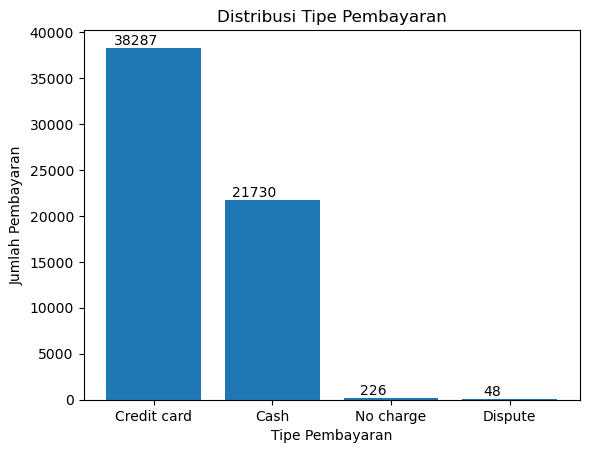

In [57]:
new_index = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}
payment_type_counts = payment_type_counts.rename(index=new_index)

bars = plt.bar(payment_type_counts.index, payment_type_counts.values)

for bar, label in zip(bars, payment_type_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, str(label), ha='center', va='bottom')

plt.title('Distribusi Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Pembayaran')

plt.show()

Berdasarkan visualisasi tersebut, dapat dilihat bahwa customer yang melakukan pembayaran dengan kartu kredit lebih banyak dibandingkan dengan pembayaran lainnya. Melalui hal tersebut dapat disimpulkan bahwa customer lebih memilih untuk menggunakan tipe pembayaran yang lebih mudah dibandingkan dengan metode konvensional yaitu dengan uang tunai.

#### Melihat tipe pembayaran yang digunakan di masing-masing wilayah dalam New York City

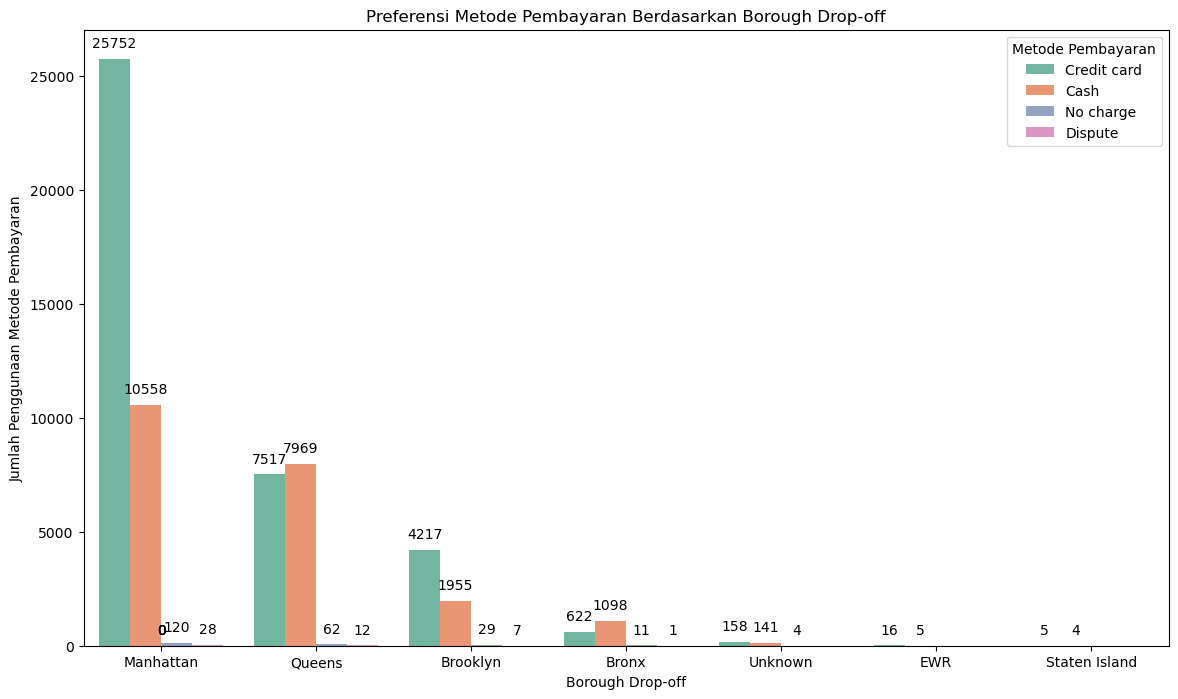

In [58]:
payment_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}

df['payment_type'] = df['payment_type'].map(payment_mapping)

plt.figure(figsize=(14, 8))
countplot = sns.countplot(data=df, x='Dropoff_Borough', hue='payment_type', palette='Set2', order=df['Dropoff_Borough'].value_counts().index)

for p in countplot.patches:
    height = int(p.get_height())
    countplot.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='bottom', xytext=(0, 6), textcoords='offset points')

plt.title('Preferensi Metode Pembayaran Berdasarkan Borough Drop-off')
plt.xlabel('Borough Drop-off')
plt.ylabel('Jumlah Penggunaan Metode Pembayaran')
plt.legend(title='Metode Pembayaran')
plt.show()

Visualisasi ini menggambarkan bahwa penggunaan kartu kredit untuk melakukan pembayaran lebih tinggi dibandingkan dengan uang tunai di Manhattan. Sedangkan di Queens masih lebih banyak customer yang melakukan pembayaran dengan uang tunai. 

## Titik Penjemputan Pada Jam Sibuk atau 'Rush Hour'

#### Melihat jumlah penjemputan berdasarkan wilayah di New Yor City

In [59]:
pickup_counts = df['Pickup_Borough'].value_counts().reset_index()
pickup_order = pickup_counts.index
pickup_counts

,Pickup_Borough,count
0,Manhattan,36622
1,Queens,15867
2,Brooklyn,7169
3,Bronx,573
4,Unknown,51
5,Staten Island,9


#### Peta untuk setiap wilayah di New York City

In [60]:
nyc_locations = {
    "Manhattan": (40.7831, -73.9712),
    "Brooklyn": (40.6782, -73.9442),
    "Queens": (40.7282, -73.7949),
    "Bronx": (40.8448, -73.8648),
    "Staten Island": (40.5795, -74.1502)
}

nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

for borough, location in nyc_locations.items():
    folium.Marker(location=location, popup=borough).add_to(nyc_map)

nyc_map

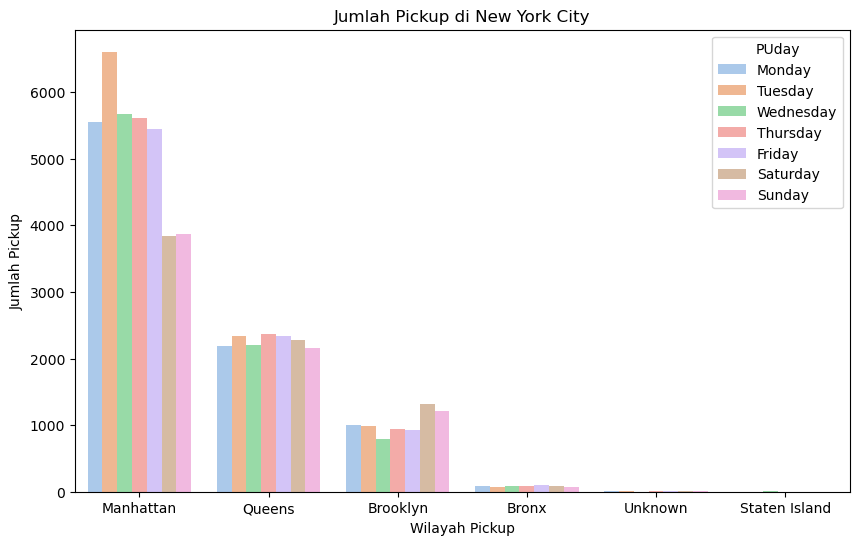

In [93]:
pickup_counts = df['Pickup_Borough'].value_counts()

pickup_counts_sorted = pickup_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pickup_Borough', hue='PUday', hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel', order=pickup_counts_sorted.index)
plt.title('Jumlah Pickup di New York City')
plt.xlabel('Wilayah Pickup')
plt.ylabel('Jumlah Pickup')
plt.show()

Untuk dapat melihat lebih jelas untuk titik penjemputan dengan permintaan yang tinggi, akan dibagi terlebih dahulu menjadi hari kerja dan akhir pekan.

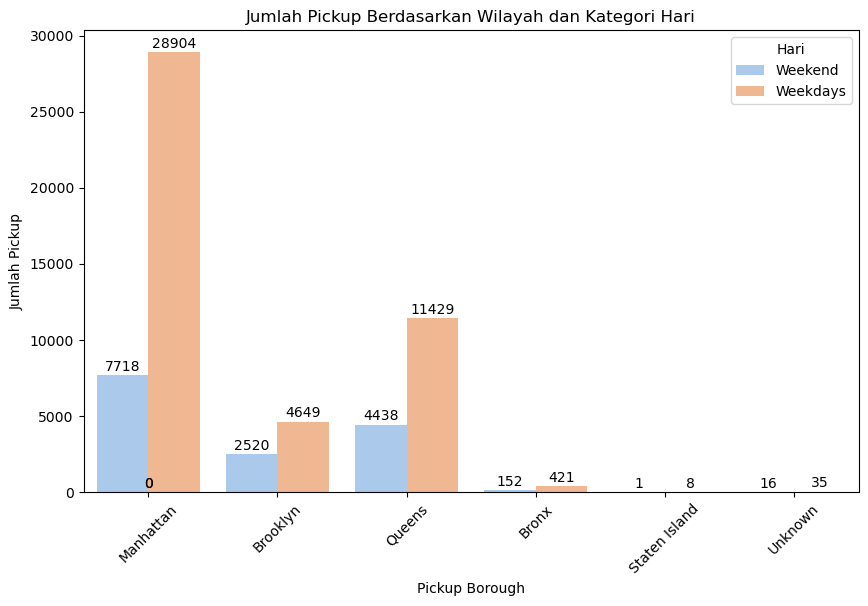

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pickup_Borough', hue='Day_Category', palette='pastel')

for p in plt.gca().patches:
    height = int(round(p.get_height()))
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.title('Jumlah Pickup Berdasarkan Wilayah dan Kategori Hari')
plt.xlabel('Pickup Borough')
plt.ylabel('Jumlah Pickup')
plt.xticks(rotation=45)
plt.legend(title='Hari')
plt.show()

Berikut tampilannya setelah dibagi lalu divisualisasikan dengan Plot untuk dapat analisa. Terlihat bahwa jumlah penjemputan paling tinggi ada pada 'weekdays' atau hari kerja. Hal ini dapat disimpulkan bahwa banyaknya jumlah penjemputan pada hari kerja terjadi pada jam-jam sibuk atau 'rush hour', sehingga permintaan taksi meningkat jam tersebut, terutama di Manhattan.

Berdasarkan hasil diatas, wilayah Manhattan, Brooklyn dan Queens akan kita highlight karena ketiga wilayah tersebut memiliki jumlah yang tinggi. Sekarang akan dianalisa untuk melihat pada jam berapa yang merupakan waktu penjemputan paling tinggi.

In [81]:
pickup_time = df[['VendorID', 'lpep_pickup_datetime']].groupby('lpep_pickup_datetime').count().sort_values('VendorID', ascending=False).reset_index()
pickup_time['pickup_hour'] = pickup_time['lpep_pickup_datetime'].dt.hour

pickup_time['Day_Category'] = pickup_time['lpep_pickup_datetime'].dt.day_name().map(day_mapping)

weekdays_data = pickup_time[pickup_time['Day_Category'] == 'Weekdays']
weekends_data = pickup_time[pickup_time['Day_Category'] == 'Weekend']

perhour_weekdays = weekdays_data[['VendorID', 'pickup_hour']].groupby('pickup_hour').count().sort_values('pickup_hour')
perhour_weekdays.rename(columns={'VendorID': 'Customer'}, inplace=True)

perhour_weekends = weekends_data[['VendorID', 'pickup_hour']].groupby('pickup_hour').count().sort_values('pickup_hour')
perhour_weekends.rename(columns={'VendorID': 'Customer'}, inplace=True)

print("Jumlah Penjemputan pada Weekdays per Jam:")
print(perhour_weekdays)

print("\n Jumlah Penjemputan Pada Weekends per Jam:")
print(perhour_weekends)

Jumlah Penjemputan pada Weekdays per Jam:
             Customer
pickup_hour          
0                 506
1                 330
2                 205
3                 197
4                 136
5                 221
6                 723
7                2046
8                2404
9                2508
10               2442
11               2335
12               2332
13               2490
14               2891
15               3385
16               3576
17               3631
18               3672
19               2922
20               2150
21               1532
22               1209
23                879

 Jumlah Penjemputan Pada Weekends per Jam:
             Customer
pickup_hour          
0                 444
1                 421
2                 324
3                 282
4                 212
5                 113
6                  94
7                 208
8                 305
9                 454
10                668
11                828
12                915
13          

Jumlah penjemputan per jam di New York City

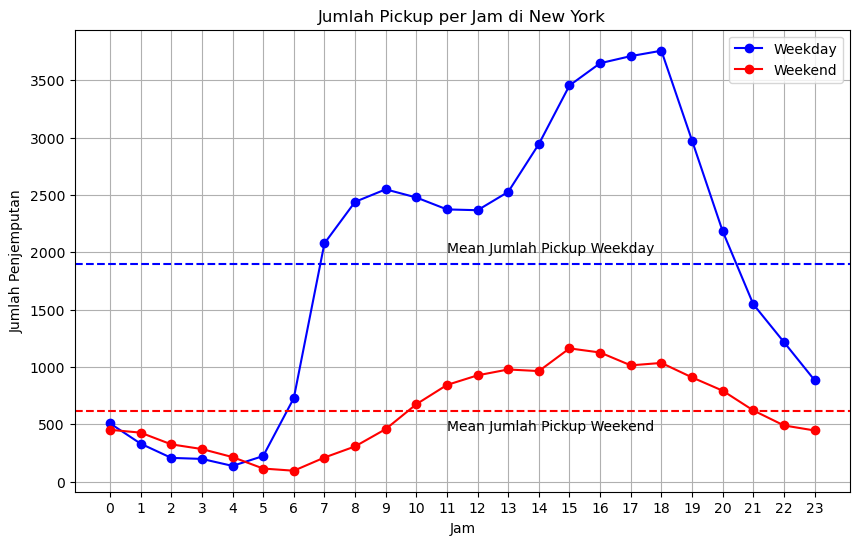

In [68]:
pickup_counts = df.groupby(['Day_Category', 'PUHour']).size().reset_index(name='pickup_count')

weekday_pickup_counts = pickup_counts[pickup_counts['Day_Category'] == 'Weekdays']
weekend_pickup_counts = pickup_counts[pickup_counts['Day_Category'] == 'Weekend']

plt.figure(figsize=(10, 6))

plt.plot(weekday_pickup_counts['PUHour'], weekday_pickup_counts['pickup_count'], marker='o', label='Weekday', color='blue')

plt.plot(weekend_pickup_counts['PUHour'], weekend_pickup_counts['pickup_count'], marker='o', label='Weekend', color='red')

plt.title('Jumlah Pickup per Jam di New York')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjemputan')
plt.axhline(y=weekday_pickup_counts['pickup_count'].mean(), linestyle='--', color='blue')
plt.axhline(y=weekend_pickup_counts['pickup_count'].mean(), linestyle='--', color='red')
text_plot='Mean Jumlah Pickup Weekday'
plt.text(11,2000,text_plot,fontsize=10)
text_plot1='Mean Jumlah Pickup Weekend'
plt.text(11,450,text_plot1,fontsize=10)
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

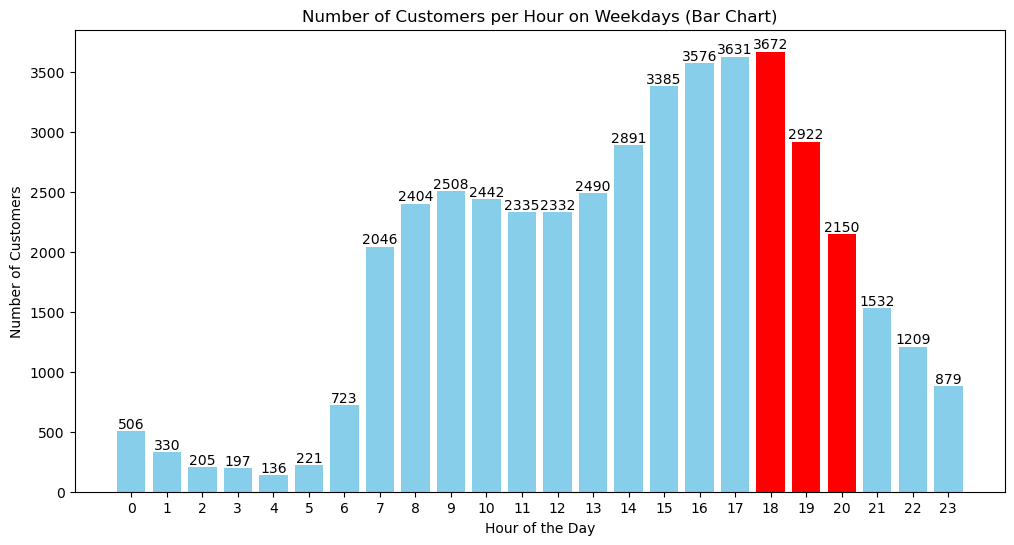

In [72]:
plt.figure(figsize=(12, 6))

colors = ['red' if 18 <= hour <= 20 else 'skyblue' for hour in perhour_weekdays.index]

plt.bar(perhour_weekdays.index, perhour_weekdays['Customer'], color=colors)

for i, txt in enumerate(perhour_weekdays['Customer']):
    plt.annotate(txt, (perhour_weekdays.index[i], txt), ha='center', va='bottom')

plt.title('Number of Customers per Hour on Weekdays (Bar Chart)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')

plt.xticks(range(24))

plt.show()

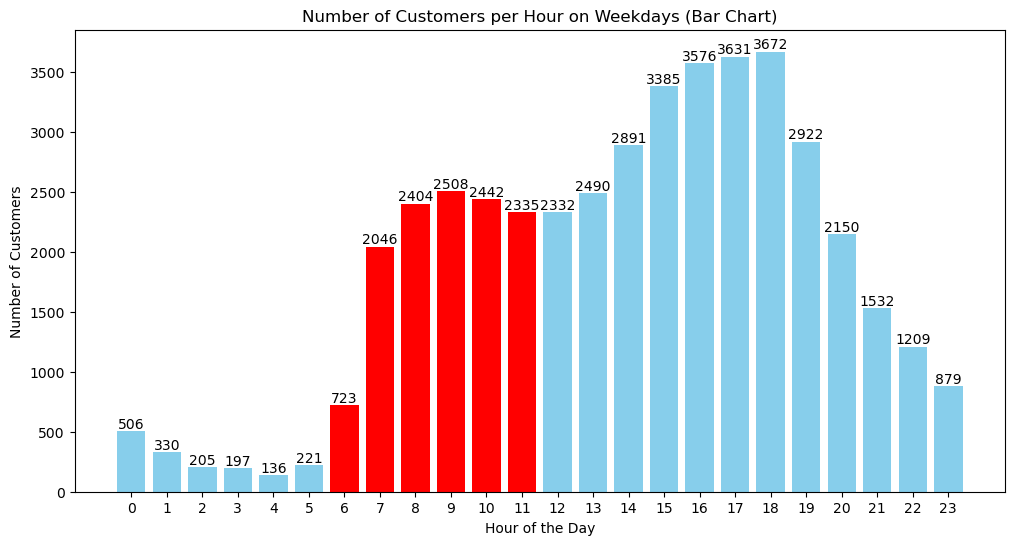

In [73]:
plt.figure(figsize=(12, 6))

colors = ['red' if 6 <= hour <= 11 else 'skyblue' for hour in perhour_weekdays.index]

plt.bar(perhour_weekdays.index, perhour_weekdays['Customer'], color=colors)

for i, txt in enumerate(perhour_weekdays['Customer']):
    plt.annotate(txt, (perhour_weekdays.index[i], txt), ha='center', va='bottom')

plt.title('Number of Customers per Hour on Weekdays (Bar Chart)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')

plt.xticks(range(24))

plt.show()

Visualisasi ini menggambarkan jumlah pelanggan yang menggunakan taksi per jamnya pada hari kerja atau 'weekdays'. Berdasarkan hasil diatas, terdapat jam-jam tertentu dimana jumlah pelanggan berada diatas rata-rata. Apabila dilihat kembali, terdapat peningkatan pelanggan pada pukul 18.00 petang lalu mengalami penurunan mulai pada pukul 20.00 malam. Sehingga dapat disimpulkan bahwa pada peningkatan tersebut adalah saat terjadinya 'rush hour' ketika jam kerja telah usai. 

Sama seperti visualisasi sebelumnya, dimana pada tampilan diatas terdapat peningkatan pelanggan pada pukul 7.00 pagi dimana puncaknya pada pukul 09.00 pagi, lalu mengalami penurunan mulai pada pukul 10.00 pagi. Maka dapat disimpulkan bahwa peningkatan tersebut adalah saat terjadinya 'rush hour' dan menurun hingga jam kerja mulai.

Jumlah penjemputan per jam di wilayah Manhattan

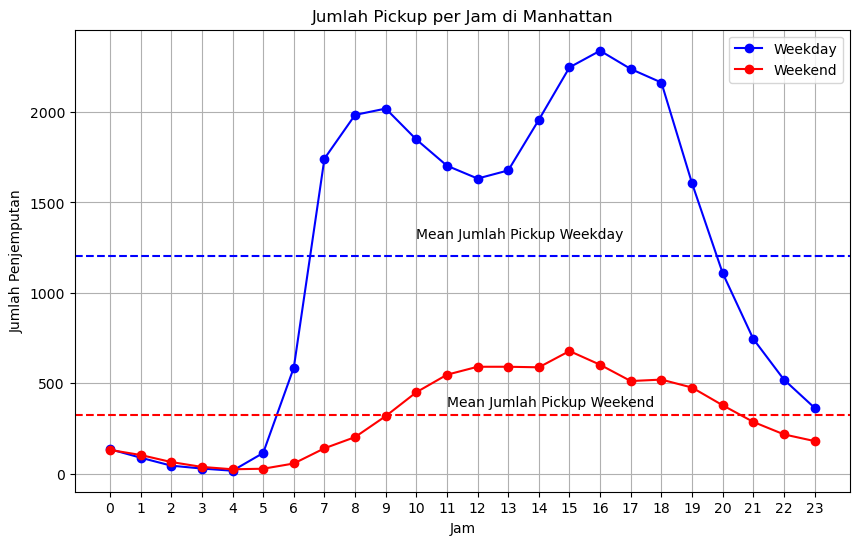

In [84]:
manhattan_df = df[df['Pickup_Borough'] == 'Manhattan']

manhattan_pickup_counts = manhattan_df.groupby(['Day_Category', 'PUHour']).size().reset_index(name='pickup_count')

manhattan_weekday_pickup_counts = manhattan_pickup_counts[manhattan_pickup_counts['Day_Category'] == 'Weekdays']
manhattan_weekend_pickup_counts = manhattan_pickup_counts[manhattan_pickup_counts['Day_Category'] == 'Weekend']

plt.figure(figsize=(10, 6))

plt.plot(manhattan_weekday_pickup_counts['PUHour'], manhattan_weekday_pickup_counts['pickup_count'], marker='o', label='Weekday', color='blue')

plt.plot(manhattan_weekend_pickup_counts['PUHour'], manhattan_weekend_pickup_counts['pickup_count'], marker='o', label='Weekend', color='red')

plt.title('Jumlah Pickup per Jam di Manhattan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjemputan')
plt.axhline(y=manhattan_weekday_pickup_counts['pickup_count'].mean(), linestyle='--', color='blue')
plt.axhline(y=manhattan_weekend_pickup_counts['pickup_count'].mean(), linestyle='--', color='red')
text_plot='Mean Jumlah Pickup Weekday'
plt.text(10,1300,text_plot,fontsize=10)
text_plot1='Mean Jumlah Pickup Weekend'
plt.text(11,370,text_plot1,fontsize=10)
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Jumlah penjemputan per jam di wilayah Brooklyn

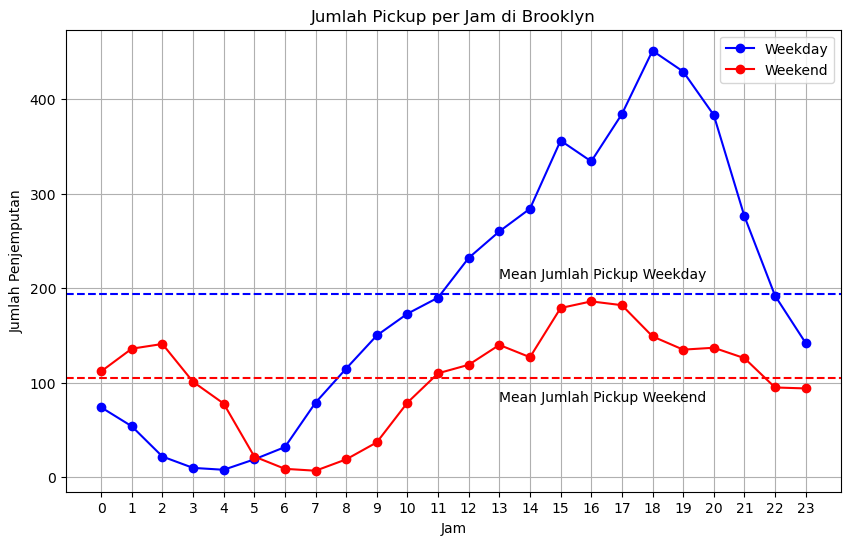

In [85]:
brooklyn_df = df[df['Pickup_Borough'] == 'Brooklyn']

brooklyn_pickup_counts = brooklyn_df.groupby(['Day_Category', 'PUHour']).size().reset_index(name='pickup_count')

brooklyn_weekday_pickup_counts = brooklyn_pickup_counts[brooklyn_pickup_counts['Day_Category'] == 'Weekdays']
brooklyn_weekend_pickup_counts = brooklyn_pickup_counts[brooklyn_pickup_counts['Day_Category'] == 'Weekend']

plt.figure(figsize=(10, 6))

plt.plot(brooklyn_weekday_pickup_counts['PUHour'], brooklyn_weekday_pickup_counts['pickup_count'], marker='o', label='Weekday', color='blue')

plt.plot(brooklyn_weekend_pickup_counts['PUHour'], brooklyn_weekend_pickup_counts['pickup_count'], marker='o', label='Weekend', color='red')

plt.title('Jumlah Pickup per Jam di Brooklyn')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjemputan')
plt.axhline(y=brooklyn_weekday_pickup_counts['pickup_count'].mean(), linestyle='--', color='blue')
plt.axhline(y=brooklyn_weekend_pickup_counts['pickup_count'].mean(), linestyle='--', color='red')
text_plot='Mean Jumlah Pickup Weekday'
plt.text(13,210,text_plot,fontsize=10)
text_plot1='Mean Jumlah Pickup Weekend'
plt.text(13,80,text_plot1,fontsize=10)
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Jumlah penjemputan per jam di wilayah Queens

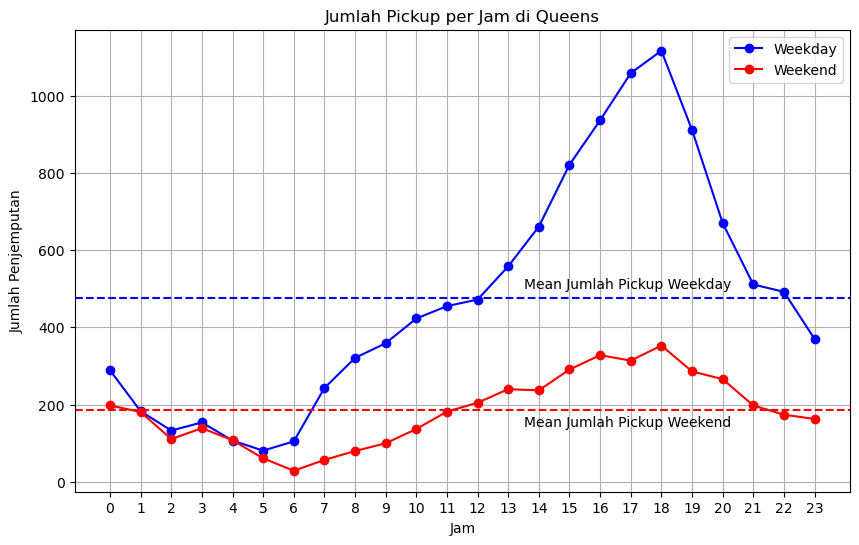

In [86]:
queens_df = df[df['Pickup_Borough'] == 'Queens']

queens_pickup_counts = queens_df.groupby(['Day_Category', 'PUHour']).size().reset_index(name='pickup_count')

queens_weekday_pickup_counts = queens_pickup_counts[queens_pickup_counts['Day_Category'] == 'Weekdays']
queens_weekend_pickup_counts = queens_pickup_counts[queens_pickup_counts['Day_Category'] == 'Weekend']

plt.figure(figsize=(10, 6))

plt.plot(queens_weekday_pickup_counts['PUHour'], queens_weekday_pickup_counts['pickup_count'], marker='o', label='Weekday', color='blue')

plt.plot(queens_weekend_pickup_counts['PUHour'], queens_weekend_pickup_counts['pickup_count'], marker='o', label='Weekend', color='red')

plt.title('Jumlah Pickup per Jam di Queens')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjemputan')
plt.axhline(y=queens_weekday_pickup_counts['pickup_count'].mean(), linestyle='--', color='blue')
plt.axhline(y=queens_weekend_pickup_counts['pickup_count'].mean(), linestyle='--', color='red')
text_plot='Mean Jumlah Pickup Weekday'
plt.text(13.5,500,text_plot,fontsize=10)
text_plot1='Mean Jumlah Pickup Weekend'
plt.text(13.5,145,text_plot1,fontsize=10)
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

## 3 . Durasi & Jarak Perjalanan dengan Total Pembayaran

In [75]:
correlation = df['lpep_trip_datetime'].corr(df['total_payment'])

print(f"Korelasi antara Durasi Perjalanan dan Total Pembayaran: {correlation}")

Korelasi antara Durasi Perjalanan dan Total Pembayaran: 0.2540561966301251


In [87]:
correlation = df['trip_distance'].corr(df['total_payment'])

print(f"Korelasi antara Durasi Perjalanan dan Total Pembayaran: {correlation}")

Korelasi antara Durasi Perjalanan dan Total Pembayaran: 0.8727535207184526


                    lpep_trip_datetime  trip_distance  total_payment
lpep_trip_datetime            1.000000       0.091909       0.100154
trip_distance                 0.091909       1.000000       0.887252
total_payment                 0.100154       0.887252       1.000000


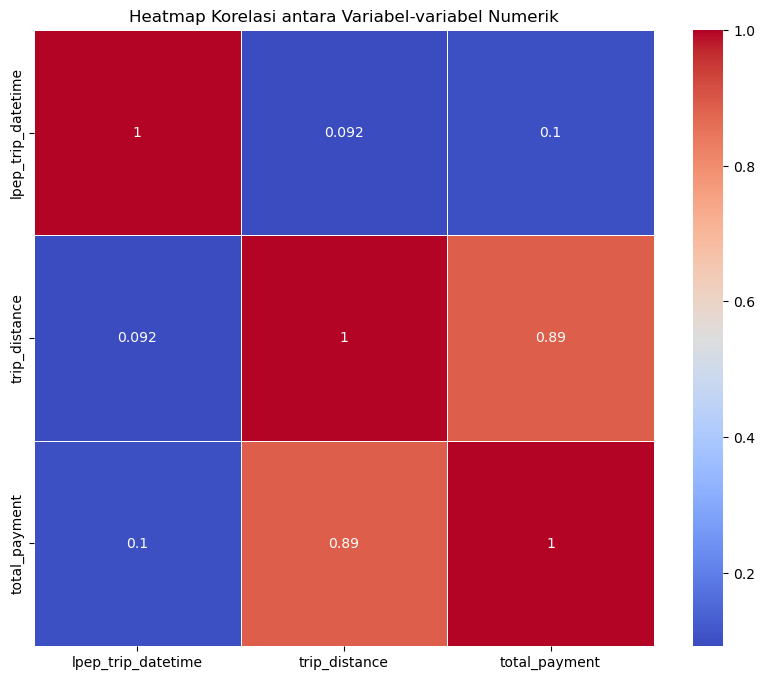

In [88]:
cols_to_corr = ['lpep_trip_datetime', 'trip_distance', 'total_payment']

# Menghitung matriks korelasi
correlation_matrix = df[cols_to_corr].corr(method='spearman')

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel-variabel Numerik')
plt.show()

Terdapat korelasi positif antara lpep_trip_datetime dan total_payment. Ini menunjukkan bahwa semakin lama durasi perjalanan maka total_payment akan cenderung lebih tinggi. Begitu juga dengan korelasi positif antara trip_distance dan total_payment, yang menunjukkan bahwa semakin jauh jarak perjalanannya yang maka total_payment yang harus dibayar penumpang akan cenderung lebih tinggi.

In [89]:
df['bin_distance']=pd.cut(df['trip_distance'],4)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,duration,PUHour,DOHour,total_payment,PUday,Day_Category,bin_distance,mins,bin_trip_distance,bin_mins
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,11.02,0,0,24.18,Sunday,Weekend,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6.77,0,0,15.84,Sunday,Weekend,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,5.82,0,0,11.20,Sunday,Weekend,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,5.97,0,0,9.00,Sunday,Weekend,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,17.55,0,1,22.95,Sunday,Weekend,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,7.98,23,23,17.30,Tuesday,Weekdays,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,10.75,23,23,19.20,Tuesday,Weekdays,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,6.02,23,23,14.16,Tuesday,Weekdays,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,9.53,23,23,22.50,Tuesday,Weekdays,"(-0.0471, 14.28]",0,"(-0.0471, 14.28]","(-0.18, 45.0]"


kolom trip_distance


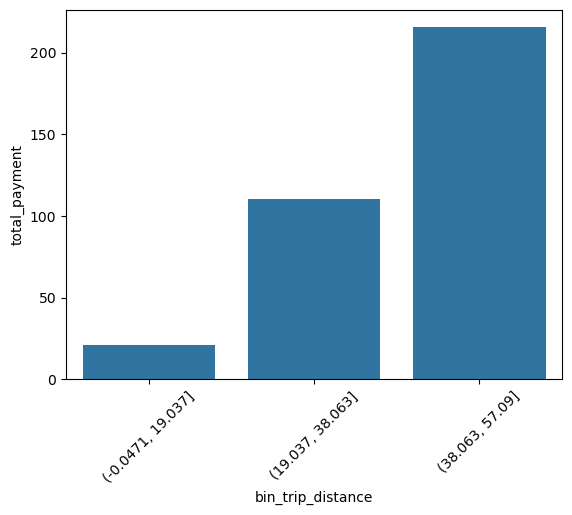

kolom hours


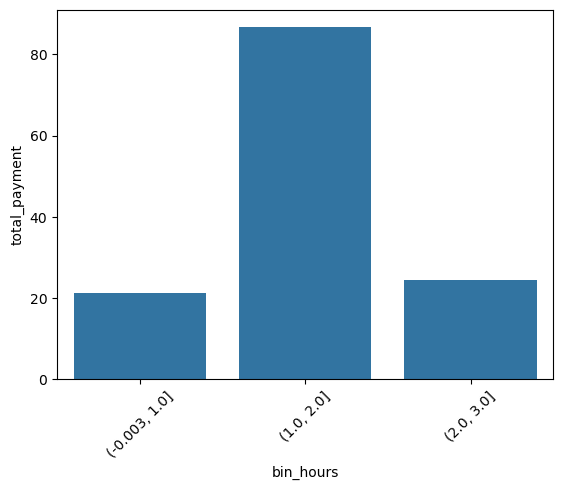

In [92]:
df['hours']=df['lpep_trip_datetime']
col=['trip_distance','hours']
for i in col:
    print(f'kolom {i}')
    df[f'bin_{i}']=pd.cut(df[i],3,duplicates='drop')
    sns.barplot(data=df.groupby(f'bin_{i}')['total_payment'].mean().reset_index(),x=f'bin_{i}',y='total_payment')
    plt.xticks(rotation=45)
    plt.show()

## Kesimpulan

   1. Kesimpulan utama yang dapat diambil dari hasil analisis ini adalah terdapat perbedaan dari segi permintaan diantara wilayah-wilayah di New York. Bahkan dalam wilayah Manhattan sendiri terdapat perbedaan yang cukup signifikan antara zona-zona yang ada didalamnya. Hasil tersebut mencerminkan aktifitas masyarakat di wilayah Manhattan dapat dikatakan lebih padat apabila dibandingkan dengan wilayah-wilayah lainnya.
    
   2. Metode pembayaran dengan menggunakan kartu kredit menurut hasil analisis lebih banyak digunakan oleh pelanggan. Hal ini mungkin terjadi karena pembayaran menggunakan kartu kredit lebih praktis dan mudah apabila dibandingkan dengan uang tunai. Namun tidak semua wilayah menjadikan penggunaan kartu kredit sebagai metode pembayaran utama, contohnya seperti wilayah Queens yang tercatat penggunaan uang tunai lebih tinggi jika dibandingkan dengan penggunaan kartu kredit.
   
   3. Durasi perjalanan dan jarak perjalanan terbukti memiliki hubungan positif terhadap total yang harus dibayar oleh pelanggan yang artinya semakin lama durasi perjalanan maka total pembayaran akan semakin tinggi, begitu juga dengan jarak perjalanan dimana semakin jauh jarak yang ditempuh maka total pembayaran akan semakin tinggi.


## Rekomendasi

Berdasarkan kesimpulan dari hasil analisis yang sudah dilakukan, berikut rekomendasi yang ditawarkan:

   1. Optimasi Armada: Mendistribusikan armada yang telah disesuaikan dengan permintaan berdasarkan wilayah serta zona. Hal tersebut akan mencegah adanya kekurangan armada ketika terjadi kenaikan permintaan tinggi di wilayah dan zona tertentu, selain itu mencegah terjadinya kelebihan armada di wilayah dan zona yang permintaannya tidak setinggi wilayah lain seperti Manhattan.
    
   2. Penyesuaian Pembayaran : Meskipun mendorong pembayaran non-tunai, tetap pastikan kenyamanan bagi pelanggan yang memilih pembayaran tunai, terutama di wilayah seperti Queens. Misalnya, pastikan pengemudi selalu memiliki kembalian yang cukup. Melalui penyesuaian tersebut, harapannya akan meningkatkan kepuasan dan loyalitas pelanggan.
    
   3. Optimalisasi Rute: Implementasikan teknologi rute optimal untuk mengurangi durasi dan jarak perjalanan, sehingga pelanggan membayar lebih sedikit dan waktu tempuh menjadi lebih efisien. Ini bisa termasuk penggunaan aplikasi navigasi yang mempertimbangkan kondisi lalu lintas real-time.
